# Homework 2: Linear Regression

The is the coding potion of Homework 2. The homework is aimed at testing the ability to deal with a real-world dataset and use linear regression on it.

In [1]:
import numpy as np
import pandas as pd

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load Dataset
Loading the California Housing dataset using sklearn.

In [2]:
# Load dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

## Part 1 : Analyse the dataset

In [3]:
# Put the dataset along with the target variable in a pandas dataframe
data = pd.DataFrame(housing.data, columns=housing.feature_names)
# Add target to data
data['target'] = housing['target']
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Part 1a : Check for missing values in the dataset

The dataset might have missing values represented by a `NaN`. Check if the dataset has such missing values.

In [4]:
# Check for missing values
def is_null(dataframe):
    """
    This function takes as input a pandas dataframe and outputs whether the
    dataframe has missing values. Missing values can be detected by checking
    for the presence of None or NaN. inf or -inf must also be treated as a missing value.

    Input:
        dataframe: Pandas dataframe
    Output:
        Return True is there are missing value in the dataframe. If not, return False.
    """
    # YOUR CODE HERE
    count = np.isinf(dataframe).values.sum() + dataframe.isnull().sum().sum()
    if count == 0:
      return False
    else:
      return True
    # raise NotImplementedError()

In [5]:
# === DO NOT MOVE/DELETE ===
# This cell is used as a placeholder for autograder script injection.

# This dataset has no null values; you can run this cell as a sanity check.
print(f"The data has{'' if is_null(data) else ' no'} missing values.")
assert not is_null(data)

The data has no missing values.


### Part 1b: Studying the distribution of the target variable

Plot the histogram of the target variable over a fixed number of bins (say, 30).

Example histogram output:

![Target histogram](https://jeffcui.com/misc/target_histogram.png)

Hint: Use the histogram plotting function available in Seaborn in Matplotlib.

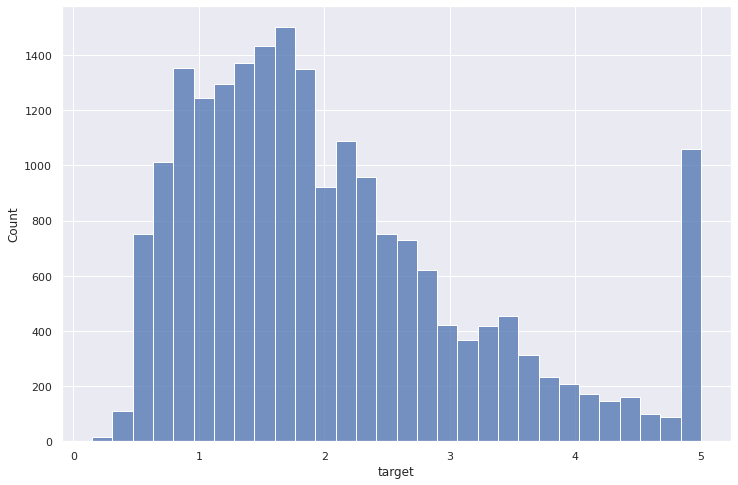

In [6]:
# Plot histogram of target variable

# YOUR CODE HERE
sns.set(rc={"figure.figsize":(12, 8)}) 
sns.histplot(data = data , x = "target", bins = 30)
# raise NotImplementedError()

### Part 1c: Plotting the correlation matrix
Given the dataset stored in the `data` variable, plot the correlation matrix for the dataset. The dataset has 9 variables (8 features and one target variable) and thus, the correlation matrix must have a size of `9x9`.

Hint: You may use the correlation matrix computation of a dataset provided by the `pandas` library.

Link: [What is a correlation matrix?](https://www.displayr.com/what-is-a-correlation-matrix/)

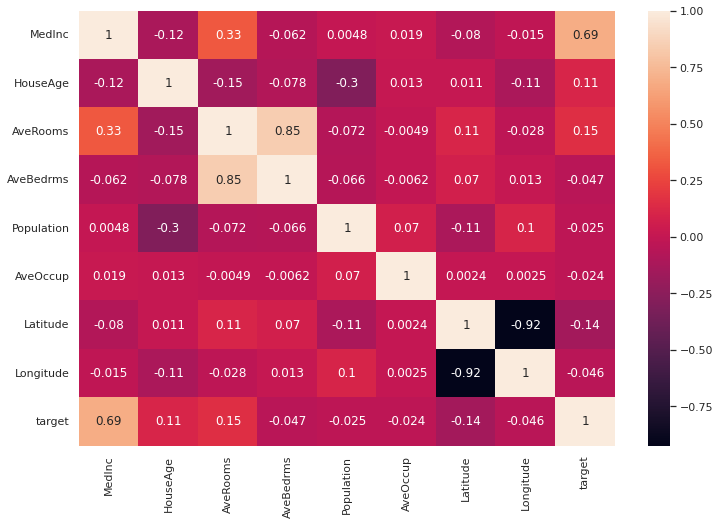

In [7]:
# Correlation matrix
def get_correlation_matrix(dataframe):
    """
    Given a pandas dataframe, obtain the correlation matrix
    computing the correlation between the entities in the dataset.

    Input:
        dataframe: Pandas dataframe
    Output:
        Return the correlation matrix as a pandas dataframe, rounded off to 2 decimal places.
    """
    # YOUR CODE HERE
    correlation_matirx = dataframe.corr()
    return correlation_matirx
    # raise NotImplementedError()

# Plot the correlation matrix
correlation_matrix = get_correlation_matrix(data)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [8]:
# === DO NOT MOVE/DELETE ===
# This cell is used as a placeholder for autograder script injection.

# You can check your output against the expected correlation matrix below:
ground_truth = np.array([
    [1.0, -0.12, 0.33, -0.06, 0.0, 0.02, -0.08, -0.02, 0.69],
    [-0.12, 1.0, -0.15, -0.08, -0.3, 0.01, 0.01, -0.11, 0.11],
    [0.33, -0.15, 1.0, 0.85, -0.07, 0.0, 0.11, -0.03, 0.15],
    [-0.06, -0.08, 0.85, 1.0, -0.07, -0.01, 0.07, 0.01, -0.05],
    [0.0, -0.3, -0.07, -0.07, 1.0, 0.07, -0.11, 0.1, -0.02],
    [0.02, 0.01, 0.0, -0.01, 0.07, 1.0, 0.0, 0.0, -0.02],
    [-0.08, 0.01, 0.11, 0.07, -0.11, 0.0, 1.0, -0.92, -0.14],
    [-0.02, -0.11, -0.03, 0.01, 0.1, 0.0, -0.92, 1.0, -0.05],
    [0.69, 0.11, 0.15, -0.05, -0.02, -0.02, -0.14, -0.05, 1.0],
])
assert np.allclose(ground_truth, get_correlation_matrix(data).to_numpy(), rtol=1e-2, atol=1e-2)

### Part 1d: Extracting relevant variables

Based on the correlation matrix obtained in the previous part, identify the top-4 most relevant features from the dataset for predicting the target variable.

1. Medlnc
2. AveRooms
3. Latitude
4. HouseAge

## Part 2: Data Manipulation

This section is focused on arranging the dataset in a format suitable for training the linear regression model.

### Part 2a: Normalize the dataset

Find the mean and standard deviation corresponding to each feature and target variable in the dataset. Use the values of the mean and standard deviation to normalize the dataset.

In [9]:
features = np.concatenate([data[name].to_numpy()[:, None] for name in housing['feature_names']], axis=1)
target = housing['target']

# Normalize data
def normalize(features, target):
    # YOUR CODE HERE

    features_std = np.std(features, axis = 0)
    features_mean = np.mean(features, axis =0)
    features_normalized = (features - features_mean)/(features_std)
    
    target_std = np.std(target, axis = 0)
    target_mean = np.mean(target, axis =0)
    target_normalized = (target - target_mean)/(target_std)

    return features_normalized, target_normalized
    # raise NotImplementedError()

features_normalized, target_normalized = normalize(features, target)

In [10]:
# === DO NOT MOVE/DELETE ===
# This cell is used as a placeholder for autograder script injection.
assert all(np.abs(features_normalized.mean(axis=0)) < 1e-2), "Mean should be close to 0"
assert all(np.abs(features_normalized.std(axis=0) - 1) < 1e-2), "Standard deviation should be close to 1"
assert np.abs(target_normalized.mean(axis=0)) < 1e-2, "Mean should be close to 0"
assert np.abs(target_normalized.std(axis=0) - 1) < 1e-2, "Standard deviation should be close to 1"

### Part 2b: Train-Test Split

Use the train-test split function from `sklearn` and execute a 80-20 train-test split of the dataset.

In [11]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features_normalized, target_normalized, test_size=0.2, random_state=0)
# raise NotImplementedError()

In [12]:
# === DO NOT MOVE/DELETE ===
# This cell is used as a placeholder for autograder script injection.

# Sanity checking:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


## Part 3: Linear Regression

In this part, a linear regression model is used to fit the dataset loaded and normalized above.

### Part 3a: Code for Linear Regression
Implement a closed-form solution for ordinary least squares linear regression in `MyLinearRegression`, and print out the RMSE and $R^2$ between the ground truth and the model prediction.

In [35]:
class MyLinearRegression:
    def __init__(self):
        self.theta = None
    
    def fit(self, X, Y):
        # Given X and Y, compute theta using the closed-form solution for linear regression.
        # YOUR CODE HERE
        # Compute (X^T X)^(-1)
        part1 = np.dot(X.T, X)
        # Compute (X^T Y)
        part2 = np.dot(X.T, Y)
        # Compute theta = (X^T X)^(-1) (X^T Y)
        self.theta = np.linalg.solve(part1, part2)
        # raise NotImplementedError()
    
    def predict(self, X):
        # Predict Y for a given X
        # YOUR CODE HERE
        return np.dot(X, self.theta)
        # raise NotImplementedError()

In [36]:
# Train the model on (X_train, Y_train) using Linear Regression 
my_model = MyLinearRegression()
my_model.fit(X_train, Y_train)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute train RMSE using (X_train, Y_train)
def train_metrics(X_train, Y_train, my_model):
    y_train_predict = my_model.predict(X_train)
    train_rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    train_r2 = r2_score(Y_train, y_train_predict)
    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(train_rmse))
    print('R2 score is {}'.format(train_r2))
    print("\n")

# Compute test RMSE using (X_test, Y_test)
def test_metrics(X_test, Y_test, my_model):
    y_test_predict = my_model.predict(X_test)
    test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    test_r2 = r2_score(Y_test, y_test_predict)
    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(test_rmse))
    print('R2 score is {}'.format(test_r2))

train_metrics(X_train, Y_train, my_model)
test_metrics(X_test, Y_test, my_model)

The model performance for training set
--------------------------------------
RMSE is 0.6269848126925497
R2 score is 0.608893585337847


The model performance for testing set
--------------------------------------
RMSE is 0.6302717773501297
R2 score is 0.5943507042437144


### Part 3b: Compare with LinearRegression from sklearn.linear_model

Use LinearRegression from the `sklearn` package to fit the dataset and compare the results obtained with your own implementaion of Linear Regression.

The linear regressor should be named `model` for the cells below to run properly.

In [38]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, Y_train)
# raise NotImplementedError()

In [39]:
# model evaluation for training set
y_train_predict = model.predict(X_train)
sklearn_train_rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
sklearn_train_r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_train_rmse))
print('R2 score is {}'.format(sklearn_train_r2))
print("\n")

# model evaluation for testing set
y_test_predict = model.predict(X_test)
sklearn_test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
sklearn_test_r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_test_rmse))
print('R2 score is {}'.format(sklearn_test_r2))

The model performance for training set
--------------------------------------
RMSE is 0.626982226453801
R2 score is 0.6088968118672872


The model performance for testing set
--------------------------------------
RMSE is 0.6302930934638351
R2 score is 0.5943232652466204


### Part 3c: Analysis Linear Regression Performance

In this section, provide the observed difference in performance along with an explanation of the following:
- Difference between training between unnormalized and normalized data.
- Difference between training on all features versus training on the top-4 most relevant features in the dataset.
- Difference between (1) training on all features (unnormalized), (2) training on top-4 unnormalized features, and (3) training on top-4 normalized features.

Write your answer below.

In [40]:
# (1) Traning unnormalized data on all features
print("Model: unnormalized data(all features)")
X_train_unnor, X_test_unnor, Y_train_unnor, Y_test_unnor = train_test_split(features, target, test_size=0.2, random_state=0)
my_model.fit(X_train_unnor, Y_train_unnor)

train_metrics(X_train_unnor, Y_train_unnor, my_model)
test_metrics(X_test_unnor, Y_test_unnor, my_model)

Model: unnormalized data(all features)
The model performance for training set
--------------------------------------
RMSE is 0.7763476606405088
R2 score is 0.5496648800413839


The model performance for testing set
--------------------------------------
RMSE is 0.7823476431899948
R2 score is 0.5306065925145123


In [41]:
# (2) training unnormalized data on the top-4 most relevant features (Medlnc, HouseAge, AveRooms, Latitude)
print("Model: unnormalized data(top4 relevant features)")
X_train_unnor_new = X_train_unnor[:,[0,1,2,6]]
X_test_unnor_new = X_test_unnor[:,[0,1,2,6]]
my_model.fit(X_train_unnor_new, Y_train_unnor)

train_metrics(X_train_unnor_new, Y_train_unnor, my_model)
test_metrics(X_test_unnor_new, Y_test_unnor, my_model)

Model: unnormalized data(top4 relevant features)
The model performance for training set
--------------------------------------
RMSE is 0.8030689808406747
R2 score is 0.5181309615487499


The model performance for testing set
--------------------------------------
RMSE is 0.8170413397548135
R2 score is 0.48805242444865515


In [42]:
# (3) training normalized data on the top-4 most relevant features (Medlnc, HouseAge, AveRooms, Latitude)
print("Model: normalized data(top4 relevant features)")
X_train_new = X_train[:,[0,1,2,6]]
X_test_new = X_test[:,[0,1,2,6]]
my_model.fit(X_train_new, Y_train)

train_metrics(X_train_new, Y_train, my_model)
test_metrics(X_test_new, Y_test, my_model)

Model: normalized data(top4 relevant features)
The model performance for training set
--------------------------------------
RMSE is 0.6913056757787523
R2 score is 0.5245321658472841


The model performance for testing set
--------------------------------------
RMSE is 0.7025733697847857
R2 score is 0.4959444812537642


YOUR ANSWER HERE

In [43]:
from tabulate import tabulate
evaluation_data = [["normalized data(all features)", 0.62698, 0.60889, 0.63027, 0.59435], 
                   ["unnormalized data(all features)", 0.77635, 0.54966, 0.78235, 0.53061], 
                   ["normalized data(top4 relevant features)", 0.80307, 0.51813, 0.81704, 0.48805], 
                   ["unnormalized data(top4 relevant features)", 0.69131, 0.52453, 0.70257, 0.49594]]
            
col_names = ["Model", "RMSE_train", "R2_train", "RMSE_test", "R2_test"]
print(tabulate(evaluation_data, headers=col_names))

Model                                        RMSE_train    R2_train    RMSE_test    R2_test
-----------------------------------------  ------------  ----------  -----------  ---------
normalized data(all features)                   0.62698     0.60889      0.63027    0.59435
unnormalized data(all features)                 0.77635     0.54966      0.78235    0.53061
normalized data(top4 relevant features)         0.80307     0.51813      0.81704    0.48805
unnormalized data(top4 relevant features)       0.69131     0.52453      0.70257    0.49594


1. Difference between training between unnormalized and normalized data:
* The RMSE of training set: unnormalized data > normalized data
* The $R^2$ of training set: unnormalized data < normalized data
* The RMSE of testing set: unnormalized data > normalized data
* The $R^2$ of testing set: unnormalized data < normalized data
---
2. Difference between training on all features versus training on the top-4 most relevant features in the dataset.
> (Normalized data)
* The RMSE of training set: top4 > all
* The $R^2$ of training set: top4 < all
* The RMSE of testing set: top4 > all
* The $R^2$ of testing set: top4 < all
> (Unnormalized data)
* In all cases: top4 < all
---
3. Difference between (1) training on all features (unnormalized), (2) training on top-4 unnormalized features, and (3) training on top-4 normalized features.
* The RMSE of traning set: (3) > (1) > (2)
* The $R^2$ of traning set: (1) > (2) > (3)
* The RMSE of testing set: (3) > (1) > (2)
* The $R^2$ of testing set: (1) > (2) > (3)